### Entregable 2: 'Diabetes Gestacional en base a medidas diagnósticas'
# **Análisis de la base de datos**


**Cargar los datos a partir del archivo**

In [ ]:
## Paquetes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df=pd.read_csv('diabetes.csv') # ó /content/sample_data/diabetes.csv
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Seleccionar las variables a utilizar renombrandolas de forma adecuada**

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.columns = ['Embarazo', 'Glucosa','PresionArterial','GrosorPiel','Insulina','IMC','HistorialFamiliarDiabetes','Edad','Resultado'] #renombrar
df.columns

Index(['Embarazo', 'Glucosa', 'PresionArterial', 'GrosorPiel', 'Insulina',
       'IMC', 'HistorialFamiliarDiabetes', 'Edad', 'Resultado'],
      dtype='object')

In [ ]:
df.head() #visualizar los primeros registros con los nuevos nombres de las variables

,Embarazo,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,HistorialFamiliarDiabetes,Edad,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Analizar el tipo de dato**

In [ ]:
print(df.dtypes) # Tipo de variables, naturaleza

Embarazo                       int64
Glucosa                        int64
PresionArterial                int64
GrosorPiel                     int64
Insulina                       int64
IMC                          float64
HistorialFamiliarDiabetes    float64
Edad                           int64
Resultado                      int64
dtype: object


In [ ]:
df.info() # Informacion de la base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Embarazo                   768 non-null    int64  
 1   Glucosa                    768 non-null    int64  
 2   PresionArterial            768 non-null    int64  
 3   GrosorPiel                 768 non-null    int64  
 4   Insulina                   768 non-null    int64  
 5   IMC                        768 non-null    float64
 6   HistorialFamiliarDiabetes  768 non-null    float64
 7   Edad                       768 non-null    int64  
 8   Resultado                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Completitud**

No se encontraron valores nulos o vacíos, por lo tanto, no fue necesario complementar o eliminar los campos. Adicional, no se cambiaron o eliminaron los datos en 0 de la variable 'Resultados' porque es de naturaleza dicótomica.

In [ ]:
# valores nulos
df.isnull().sum()

Embarazo                     0
Glucosa                      0
PresionArterial              0
GrosorPiel                   0
Insulina                     0
IMC                          0
HistorialFamiliarDiabetes    0
Edad                         0
Resultado                    0
dtype: int64

In [ ]:
## Cantidad de valores en cero 0 por vble cuantitativa
print(df[df['PresionArterial']==0].shape[0])
print(df[df['Glucosa']==0].shape[0])
print(df[df['GrosorPiel']==0].shape[0])
print(df[df['Insulina']==0].shape[0])
print(df[df['IMC']==0].shape[0])

35
5
227
374
11


In [ ]:
# Cantidad de valores en cero 0 por vble cuantitativa
print(df[df['PresionArterial']==0].shape[0])
print(df[df['Glucosa']==0].shape[0])
print(df[df['GrosorPiel']==0].shape[0])
print(df[df['Insulina']==0].shape[0])
print(df[df['IMC']==0].shape[0])

0
0
0
0
0


**Medidas de tendencia central**

In [ ]:
df.describe()

,Embarazo,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,HistorialFamiliarDiabetes,Edad,Resultado
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Analizar de forma númerica y gráfica los datos**

In [ ]:
df.shape # numero de datos y columnas

(768, 9)

In [ ]:
df.corr() #correlación de las variables

,Embarazo,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,HistorialFamiliarDiabetes,Edad,Resultado
Embarazo,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucosa,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
PresionArterial,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
GrosorPiel,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulina,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
IMC,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
HistorialFamiliarDiabetes,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Edad,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Resultado,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
## Gráfico de cajas y bigotes de la presencia de diabetes según el número de embarazos en las mujeres

import plotly.graph_objects as go
import numpy as np


fig = go.Figure()
fig.add_trace(go.Box(y=df['Embarazo'].loc[df['Resultado']==1],name="Diabetes"))
fig.add_trace(go.Box(y=df['Embarazo'].loc[df['Resultado']==0],name="No diabetes"))
fig.update_layout(
    title={
        'text': "Cantidad de mujeres con diabetes según número de embarazos",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

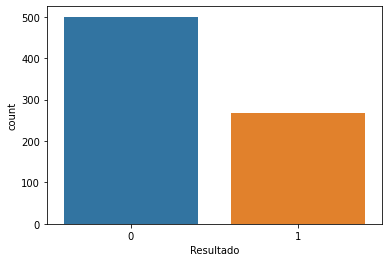

In [ ]:
## Gráfico de barras de la variable dicótomica 'Resultado'
sns.countplot(x='Resultado',data=df)

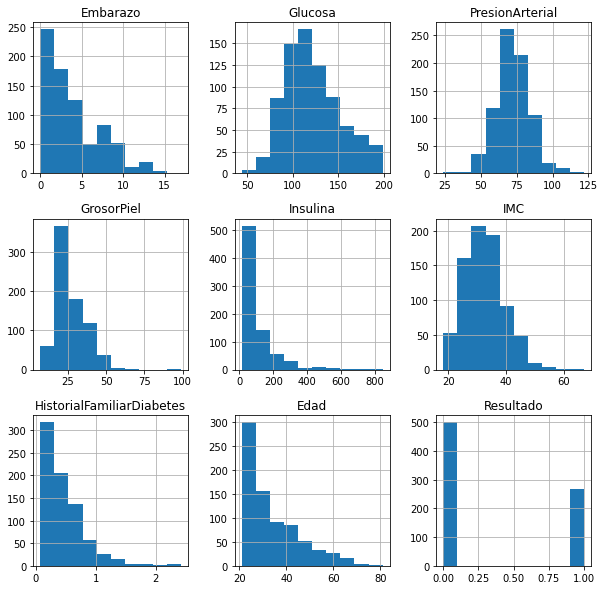

In [ ]:
# Histograma por cada variable
df.hist(bins=10,figsize=(10,10))
plt.show()

In [ ]:
# Diagrama de dispersión

import plotly.express as px
#Puntos azules -> clase negativa
#Puntos amarillos -> clase positiva
fig = px.scatter_matrix(df, color="Resultado")
fig.update_layout(
    title='Dispersión de los datos',
    width=1500,
    height=1500,
)
fig.show()

**Crear función de usuario para analizar datos númericos**


In [ ]:
## tabla pivote
def pivote(a,b):
  d=df.pivot_table(a,b)
  return d

In [ ]:
print(pivote('Edad','Resultado'))

                Edad
Resultado           
0          31.190000
1          37.067164


In [ ]:
## agrupar categorias
def group(g):
  h=df.groupby(g).size()
  return h

In [ ]:
group('Resultado')

Resultado
0    500
1    268
dtype: int64

### Entregable 3. Solución a la pregunta de negocio
# **Creación modelos**


In [ ]:
# Reemplazar los valores en 0 por la media o la mediana de la vble

df['Glucosa']=df['Glucosa'].replace(0,df['Glucosa'].mean()) #Distribución normal
df['PresionArterial']=df['PresionArterial'].replace(0,df['PresionArterial'].mean()) #Distribución normal
df['GrosorPiel']=df['GrosorPiel'].replace(0,df['GrosorPiel'].median()) #Distribución sesgada
df['Insulina']=df['Insulina'].replace(0,df['Insulina'].median()) #Distribución sesgada
df['IMC']=df['IMC'].replace(0,df['IMC'].median()) #Distribución sesgada
df.head()

,Embarazo,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,HistorialFamiliarDiabetes,Edad,Resultado
0,6,148.0,72.0,35,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1


In [ ]:
# Transformación de los datos atípicos
from sklearn.preprocessing import QuantileTransformer
df_selected=df.drop(['PresionArterial','Insulina','HistorialFamiliarDiabetes'],axis='columns')
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Embarazo', 'Glucosa','GrosorPiel','IMC','Edad','Resultado']
df_new.head()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Embarazo,Glucosa,GrosorPiel,IMC,Edad,Resultado
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


In [ ]:
target_name='Resultado'
y= df_new[target_name] #predicciones dadas - datos de entrenamiento
X=df_new.drop(target_name,axis=1) #Todas las columnas como X, excepto 'Outcome'

In [ ]:
X.head() # contiene sólo los de carácteristica independiente

,Embarazo,Glucosa,GrosorPiel,IMC,Edad
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [ ]:
y.head() # VARIABLE PREDICTORS

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Resultado, dtype: float64

**División Train - Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0) #diviendo los datos en 80% para entrenamiento, 20% de validación

In [ ]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [ ]:
X_test.shape,y_test.shape

((154, 5), (154,))

# **Algoritmos de clasificación**

KNN,
Naive Bayes,
SVM,
Decision Tree,
Random Forest,
Logistic Regression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

### 1.Nearest Neighbours

In [ ]:
#List Hyperparameters to tune
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Making model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model = grid_search.fit(X_train,y_train)

In [ ]:
#Predict testing set
knn_pred = best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,knn_pred)
(print ("Nearest Neighbours testing accuracy is ", round(accuracy,2) * 100, "%"))
A1 = "Nearest Neighbours testing accuracy is ", round(accuracy,2) * 100, "%"

Nearest Neighbours testing accuracy is  81.0 %


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<AxesSubplot:>

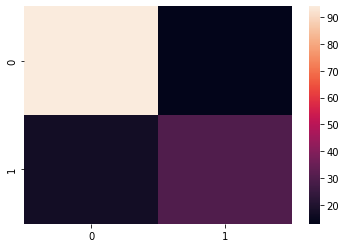

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

### 2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
best_model= nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [ ]:
nb_pred=best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,nb_pred)
A2=print ("Naive Bayes testing accuracy is ", round(accuracy,2) * 100, "%")
A2= "Naive Bayes testing accuracy is ", round(accuracy,2) * 100, "%"

Naive Bayes testing accuracy is  77.0 %


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       107
         1.0       0.64      0.53      0.58        47

    accuracy                           0.77       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.76      0.77      0.76       154


 F1:
 0.5813953488372093

 Precision score is:
 0.6410256410256411

 Recall score is:
 0.5319148936170213

 Confusion Matrix:



<AxesSubplot:>

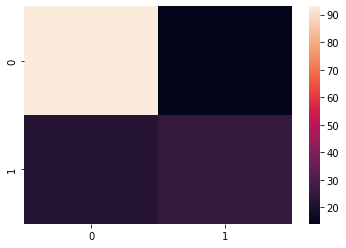

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

### 3. Support Vector Machine

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

In [ ]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

In [ ]:
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
grid_result = grid_search.fit(X, y)
svm_pred=grid_result.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,svm_pred)
A3=print ("svm testing accuracy is ", round(accuracy,2) * 100, "%")
A3= "svm testing accuracy is ", round(accuracy,2) * 100, "%"

svm testing accuracy is  82.0 %


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       107
         1.0       0.73      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.82      0.82      0.82       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<AxesSubplot:>

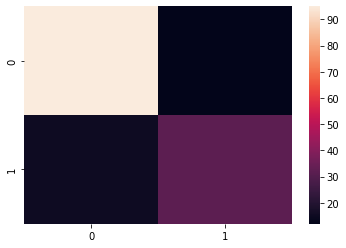

In [ ]:
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

### 4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
best_model=grid_search.fit(X_train, y_train)
dt_pred=best_model.predict(X_test)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,dt_pred)
A4=print ("Decision tree testing accuracy is ", round(accuracy,2) * 100, "%")
A4= "Decision tree testing accuracy is ", round(accuracy,2) * 100, "%"

Decision tree testing accuracy is  79.0 %


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



<AxesSubplot:>

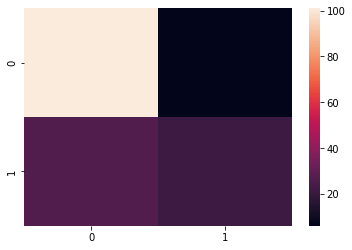

In [ ]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))

### 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# define models and parameters
model = RandomForestClassifier()
n_estimators = [1800]
max_features = ['sqrt', 'log2']

In [ ]:
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
best_model = grid_search.fit(X_train, y_train)
rf_pred=best_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,rf_pred)
A5=print ("Random forest testing accuracy is ", round(accuracy,2) * 100, "%")
A5="Random forest testing accuracy is ", round(accuracy,2) * 100, "%"

Random forest testing accuracy is  79.0 %


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.84      0.85       107
         1.0       0.65      0.66      0.65        47

    accuracy                           0.79       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6666666666666666

 Precision score is:
 0.6976744186046512

 Recall score is:
 0.6382978723404256

 Confusion Matrix:



<AxesSubplot:>

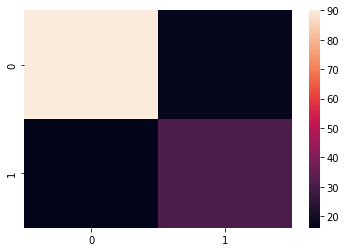

In [ ]:
print("Classification Report is:\n",classification_report(y_test,rf_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,rf_pred))

### 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lr_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test,lr_pred)
A6=print ("Logistic regression testing accuracy is ", round(accuracy,2) * 100, "%")
A6= "Logistic regression testing accuracy is ", round(accuracy,2) * 100, "%"

Logistic regression testing accuracy is  79.0 %


Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.627906976744186

 Precision score is:
 0.6923076923076923

 Recall score is:
 0.574468085106383

 Confusion Matrix:



<AxesSubplot:>

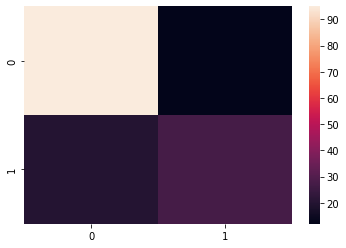

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

In [ ]:
print(A1)
print(A2)
print(A3)
print(A4)
print(A5)
print(A6)

('Nearest Neighbours testing accuracy is ', 81.0, '%')
('Naive Bayes testing accuracy is ', 77.0, '%')
('svm testing accuracy is ', 82.0, '%')
('Decision tree testing accuracy is ', 79.0, '%')
('Random forest testing accuracy is ', 79.0, '%')
('Logistic regression testing accuracy is ', 79.0, '%')


###**EL MEJOR MODELO ES EL SVM, CON UN ACCURACY DEL 82%**